## KNN Algorithm used to Classify Movie Genres

### Create the KNN classifier 

In [11]:
import numpy as np
from collections import Counter

class SimpleKNN:
    def __init__(self, k=3):
        #initialize with k neighbors (default is 3)
        self.k=k
    
    def fit(self, X, y):
        self.X_train=X
        self.y_train=y

    def predict(self, X):
    #Make predictions for new data points
        return np.array([self._predict_single(x) for x in X])
    
    def _predict_single(self, x):
        # Predict class for a single point
        # Calculate distances to all training points
        distances = [np.sqrt(np.sum((x - x_train)**2)) 
            for x_train in self.X_train]
        
        # Get k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        # Return most common class
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [12]:
# Example: Movie Genre Classification
# Features: [Action Score, Romance Score]
X_train = np.array([
    [8, 2],  # Action movie
    [7, 3],  # Action movie
    [2, 8],  # Romance movie
    [3, 7],  # Romance movie
    [1, 9],  # Romance movie
    [9, 1]   # Action movie
])
y_train = np.array(['Action', 'Action', 'Romance', 'Romance', 'Romance', 'Action'])

# Create and train model
knn = SimpleKNN(k=3)
knn.fit(X_train, y_train)

# Predict a new movie
new_movie = np.array([4, 6])  # Mix of action and romance
prediction = knn.predict([new_movie])
print(f"Predicted genre: {prediction[0]}")

Predicted genre: Romance


### testing on a bigger dataset

In [13]:
new_movies = np.array([
    [6, 2],   # Likely Action
    [2, 9],   # Likely Romance
    [5, 5],   # Mixed
    [7, 1],   # Strong Action
    [1, 10],  # Strong Romance
    [3, 7],   # Likely Romance
    [8, 3],   # Likely Action
    [4, 6],   # Mixed (same as before)
    [6, 5],   # Slightly Action
    [2, 6]    # Likely Romance
])

predictions = knn.predict(new_movies)

for i, pred in enumerate(predictions):
    print(f"Movie {i+1} (Action: {new_movies[i][0]}, Romance: {new_movies[i][1]}) → Predicted genre: {pred}")


Movie 1 (Action: 6, Romance: 2) → Predicted genre: Action
Movie 2 (Action: 2, Romance: 9) → Predicted genre: Romance
Movie 3 (Action: 5, Romance: 5) → Predicted genre: Action
Movie 4 (Action: 7, Romance: 1) → Predicted genre: Action
Movie 5 (Action: 1, Romance: 10) → Predicted genre: Romance
Movie 6 (Action: 3, Romance: 7) → Predicted genre: Romance
Movie 7 (Action: 8, Romance: 3) → Predicted genre: Action
Movie 8 (Action: 4, Romance: 6) → Predicted genre: Romance
Movie 9 (Action: 6, Romance: 5) → Predicted genre: Action
Movie 10 (Action: 2, Romance: 6) → Predicted genre: Romance


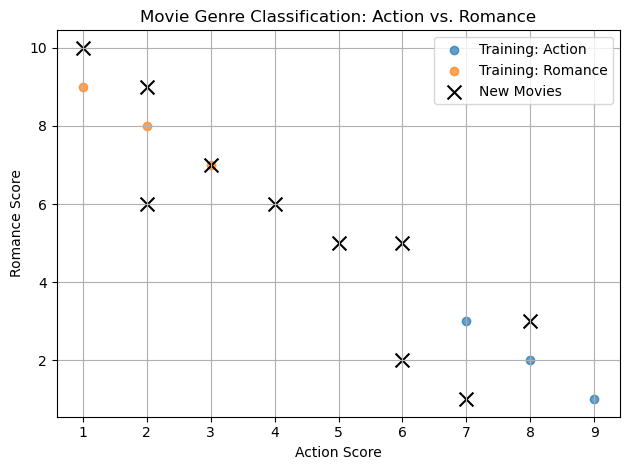

In [14]:
import matplotlib.pyplot as plt

# Plot training data
for genre in ['Action', 'Romance']:
    genre_points = X_train[y_train == genre]
    plt.scatter(genre_points[:, 0], genre_points[:, 1],
                label=f'Training: {genre}', alpha=0.7)

# Plot new movie points
plt.scatter(new_movies[:, 0], new_movies[:, 1],
            c='black', marker='x', s=100, label='New Movies')

# Labels and styling
plt.xlabel('Action Score')
plt.ylabel('Romance Score')
plt.title('Movie Genre Classification: Action vs. Romance')
plt.legend()
plt.grid(True)
plt.tight_layout()